# PR Project Visualizations

In [81]:
# Read in the data

res <- read.csv("results.csv")
head(res)

Video.Name,Category,Actual.Count,Females,Males,Results,Found.Females,Found.Males
3 Products Apple Should've Made,Apple Products,1,0,1,3,3,0
8 Discontinued Apple Products You May Not Remember,Apple Products,17,8,9,4,2,2
11 Awesome New apple products coming soon (LEAKED!!) early 2020!,Apple Products,0,0,0,0,0,0
All Of Apple's Products,Apple Products,5,2,3,3,0,3
Apple products collection,Apple Products,1,0,1,1,1,0
Apple’s Product Evolution,Apple Products,2,1,1,2,0,2


## Comparing Actual Count with Results

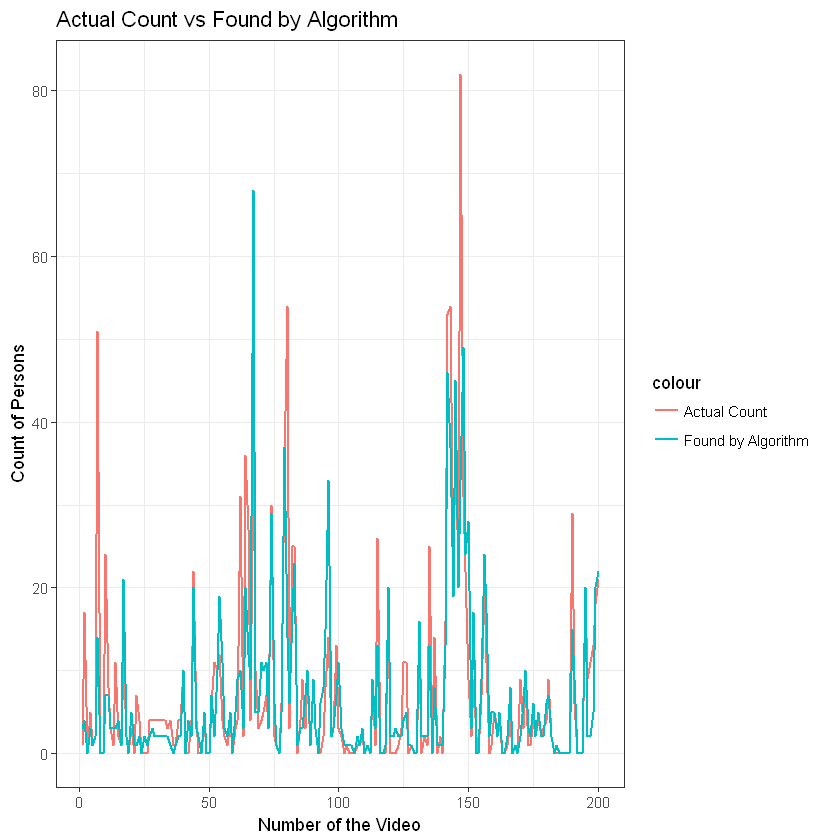

In [133]:
library(ggplot2)
## Plot of actual and found count

x = c(1:nrow(res))

p11 <- ggplot(data = res) + 
geom_line(aes(x=x, y=Actual.Count, col = "Actual Count"), size = 0.7)+
geom_line(aes(x=x, y=Results, col = "Found by Algorithm"), size = 0.7)+
theme_bw()+
ggtitle("Actual Count vs Found by Algorithm")+
xlab("Number of the Video")+
ylab("Count of Persons")
p11

In [ ]:
ggsave("p11")

## RMSE of Results

In [172]:
# Get RMSE of results

categories <- unique(res$Category)
categories <- lapply(categories, as.character)
cat_errors <- matrix(NA, nrow = length(categories), ncol = 2)

for(i in c(1:length(categories)))
{
    temp <- res[res$Category == categories[i],]
    rmse <- sqrt(mean((temp$Actual.Count - temp$Results)^2))
    cat <- categories[[i]]
    cat_errors[i,] <- cbind(cat, as.numeric(rmse))
}

colnames(cat_errors) <- c("Category", "RMSE")
cat_errors[1,1] <- "Apple"
cat_errors


Category,RMSE
Apple,9.98248466064436
Call of Duty,2.12132034355964
Coldplay,3.29393381840012
dance,13.3322916259734
Donald Trump,5.9791303715507
introduction,3.07408522978788
marketplace,3.90512483795333
oscar,13.4126805672841
Sushi,2.19089023002066
Tartu,4.52769256906871


In [129]:
mean(as.numeric(cat_errors[,2]))

[1] 6.181963

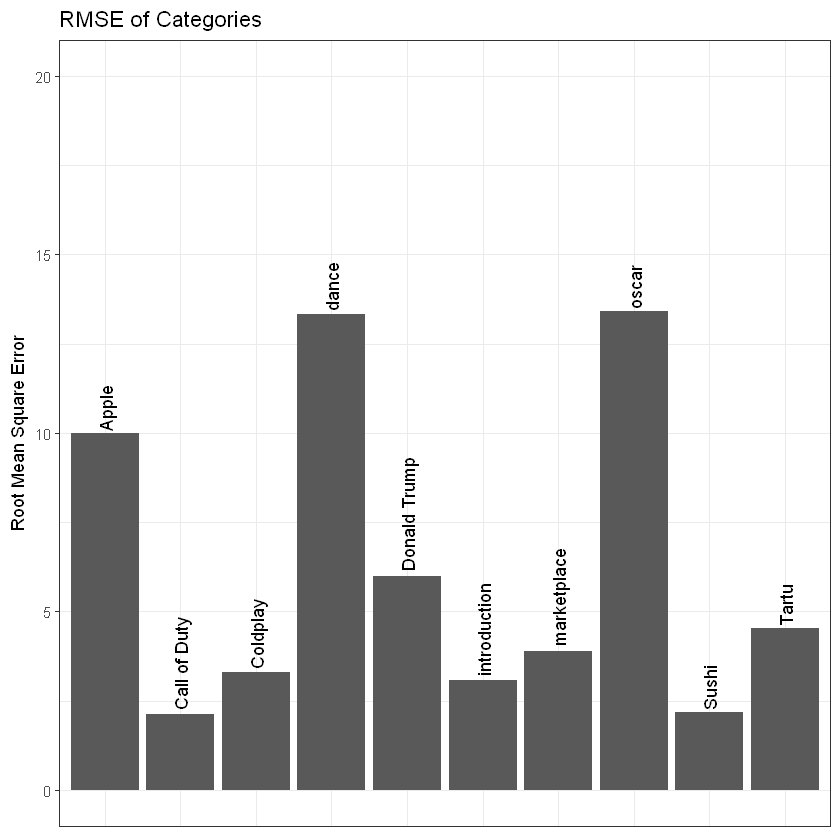

In [178]:
# Plot RMSE-s
p <- ggplot()+
geom_bar(aes(x = cat_errors[,1], y = as.numeric(cat_errors[,2])), stat='identity')+
theme_bw()+
ggtitle("RMSE of Categories")+
ylab("Root Mean Square Error")+
xlab("Category")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
geom_text(aes(x=cat_errors[,1], y = as.numeric(cat_errors[,2]), label=cat_errors[,1], hjust = -0.05, angle = 90),
          col = "black")+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
ylim(c(0,20))

p


In [179]:
ggsave(filename="count_RMSE.png", plot=p, height = 2, width = 6)

## Results on Gender Recognition

In [87]:
head(res)

Video.Name,Category,Actual.Count,Females,Males,Results,Found.Females,Found.Males
3 Products Apple Should've Made,Apple Products,1,0,1,3,3,0
8 Discontinued Apple Products You May Not Remember,Apple Products,17,8,9,4,2,2
11 Awesome New apple products coming soon (LEAKED!!) early 2020!,Apple Products,0,0,0,0,0,0
All Of Apple's Products,Apple Products,5,2,3,3,0,3
Apple products collection,Apple Products,1,0,1,1,1,0
Apple’s Product Evolution,Apple Products,2,1,1,2,0,2


## Accuracy of Predicting Majority of Gender.

In [106]:
res$Majority.Females <- res$Females > res$Males  # Majority of people in videos are female
res$Majority.Found.Females <- res$Found.Females > res$Found.Males  # Majority of people in videos are female
accuracy <- sum(res$Majority.Females == res$Majority.Found.Females)/nrow(res)*100
paste("Overall accuracy:", accuracy)
accuracy

[1] "Overall accuracy: 74.5"

[1] 74.5

## Accuracy of Independent Groups

In [190]:
categories <- unique(res$Category)
categories <- lapply(categories, as.character)
cat_acc <- matrix(NA, nrow = length(categories), ncol = 2)

for(i in c(1:length(categories)))
{
    temp <- res[res$Category == categories[i],]
    females <- temp$Females > temp$Males  # Majority of people in videos are female
    found.females <- temp$Found.Females > temp$Found.Males  # Majority of people in videos are female
    accuracy <- sum(females == found.females)/nrow(temp)*100
    cat <- categories[[i]]
    cat_acc[i,] <- cbind(cat, as.numeric(accuracy))
}

colnames(cat_acc) <- c("Category", "Accuracy")
cat_acc[1,1] <- "Apple"
cat_acc

Category,Accuracy
Apple,75
Call of Duty,85
Coldplay,80
dance,35
Donald Trump,85
introduction,85
marketplace,65
oscar,70
Sushi,80
Tartu,85


## Plot Gender Recognition Accuracy of Category

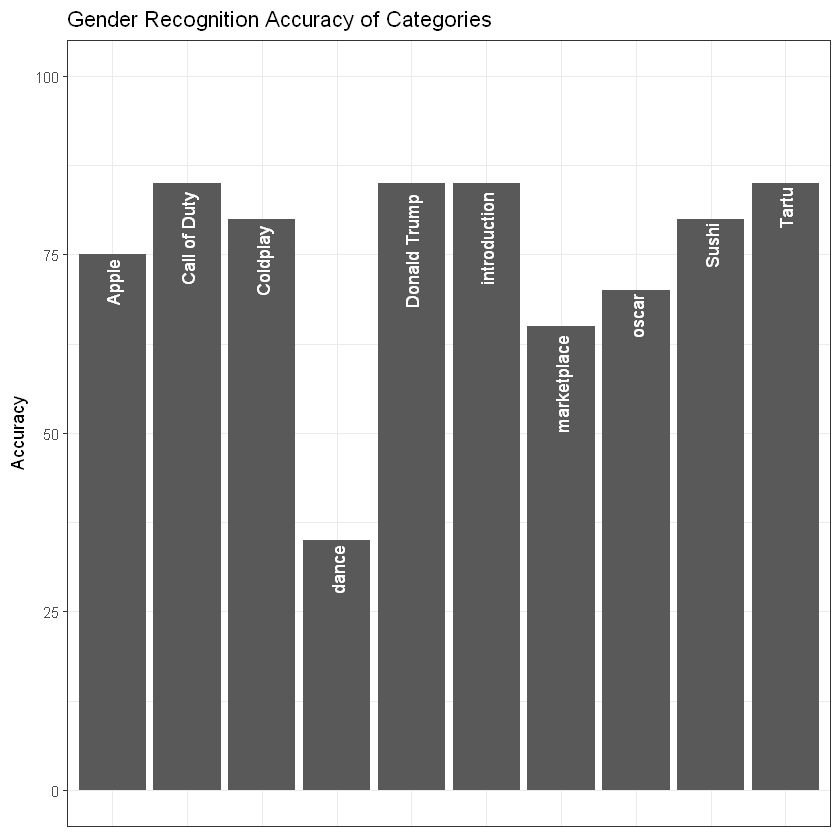

In [191]:
p2 <- ggplot()+
geom_bar(aes(x = cat_acc[,1], y = as.numeric(cat_acc[,2])), stat='identity')+
geom_text(aes(x=cat_acc[,1], y = as.numeric(cat_acc[,2]), label=cat_acc[,1], hjust = 1.1, angle = 90),
          col = "white")+
theme_bw()+
ggtitle("Gender Recognition Accuracy of Categories")+
ylab("Accuracy")+
xlab("Category")+
ylim(0, 100)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

p2

In [192]:
#ggsave("gender_accuracy.png", p2)
ggsave(filename="gender_accuracy.png", plot=p2, height = 2.1, width = 6)